In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
sns.set()
sns.set_style("whitegrid")


In [60]:
from scipy.optimize import curve_fit

In [69]:
N = [10 , 20  , 80 , 200 , 400 , 800 , 1000 ]
time = [0.0277 , 0.0523 , 0.216 , 0.619 , 1.566 , 4.05 , 5.74 ]
errors = [0.0027 , 0.0047 , 0.012 , 0.025 , 0.044 ,0.11 , 0.16]

In [81]:
def quadratic(x ,a ,b , c):
    return a*x**2 + b*x+ c

param , popt = curve_fit(quadratic , N , time)
print(param)
print(np.sqrt(np.diag(popt)))

[ 3.14872118e-06  2.58192161e-03 -3.57085453e-03]
[1.09778226e-07 1.09932468e-04 1.61242339e-02]


In [71]:
residuals = np.zeros(len(N))
for i in range(len(N)):
    residuals[i] = time[i] - quadratic(N[i], *param)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((time-np.mean(time))**2)

r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

0.9999195997033514


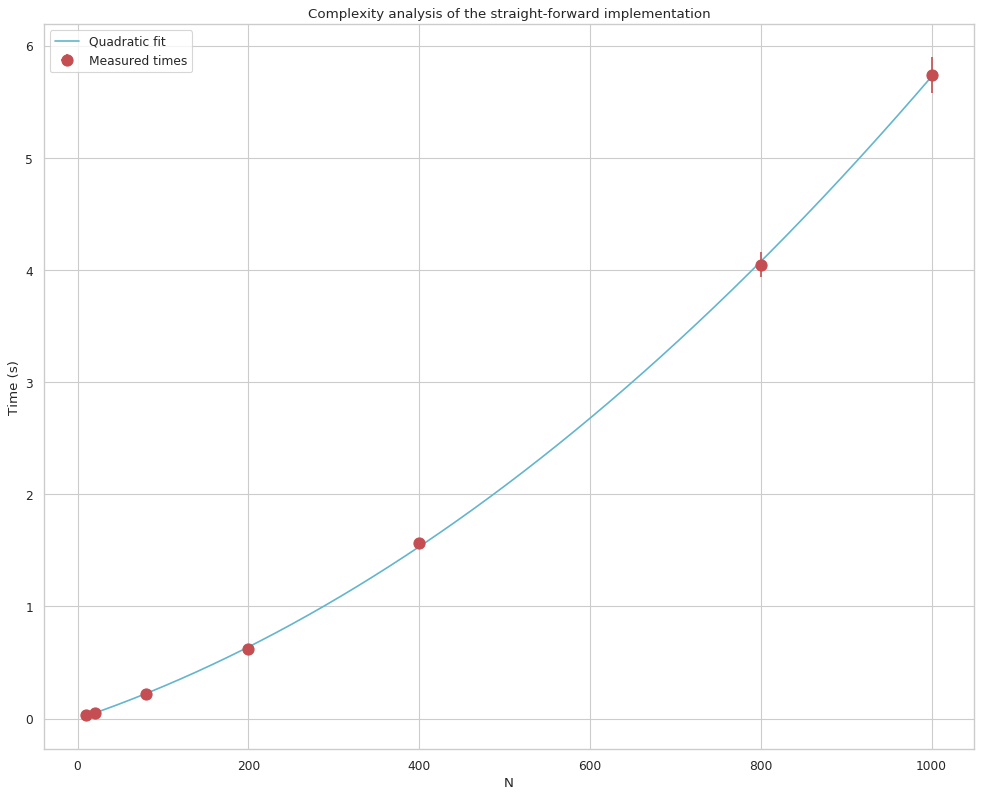

In [82]:
figure = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(N, time, xerr=0, yerr=errors ,  fmt='ro', ecolor='r' , markersize = 10 , label = "Measured times")
numbers = np.linspace(min(N) , max(N) , 10000)
y_fit = []
for i in range(len(numbers)):
    y_fit.append(quadratic(numbers[i] , *param))
plt.plot(numbers , y_fit, 'c-' , label = "Quadratic fit")
plt.ylabel("Time (s)")
plt.xlabel("N")
plt.title("Complexity analysis of the straight-forward implementation")
plt.legend(loc = 2)
plt.savefig("complexity_initial.pdf")
plt.show(True)

In [85]:
0.0318-0.0327

-0.000899999999999998